## Drop Out을 사용해 MNIST 학습해보기

### 사용할 모듈 추가

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### MNIST 데이터 불러오기

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


### 상수 정의

In [3]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

### 입력값 placeholder 선언

In [4]:
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

### keep_prob 선언
`tensorflow 1.0`부터는 **keep_prob**를 사용한다.<br/>
이것은 전체 네트워크중 몇 퍼센트를 **keep**할 것인지 결정한다.<br/>
**학습**과정에서는 **0.5 ~ 0.7**정도의 수치를 **keep**하고<br/>
**테스트**과정에서는 반드시 전체(**1**)를 **keep**해야 한다.<br/>

In [5]:
keep_prob = tf.placeholder(tf.float32)

### Neural Network Layer 구성
**Drop Out**을 사용할 하나의 Layer를 추가로 구성하면 된다.<br/>

In [6]:
W1 = tf.get_variable("W1", shape=[784, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([512]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)
L1 = tf.nn.dropout(L1, keep_prob=keep_prob)

W2 = tf.get_variable("W2", shape=[512, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([512]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)
L2 = tf.nn.dropout(L2, keep_prob=keep_prob)

W3 = tf.get_variable("W3", shape=[512, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([512]))
L3 = tf.nn.relu(tf.matmul(L2, W3) + b3)
L3 = tf.nn.dropout(L3, keep_prob=keep_prob)

W4 = tf.get_variable("W4", shape=[512, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([512]))
L4 = tf.nn.relu(tf.matmul(L3, W4) + b4)
L4 = tf.nn.dropout(L4, keep_prob=keep_prob)

W5 = tf.get_variable("W5", shape=[512, 10],
                     initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L4, W5) + b5

### 손실함수와 최적화 방법 정의

In [7]:
cost = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits_v2(logits=hypothesis, labels=Y)
)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

### Session 초기화

In [8]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

### 모델 학습 진행

In [9]:
for epoch in range(training_epochs):
    avg_cost = 0

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys, keep_prob: 0.7}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

Epoch: 0001 cost = 0.468633001
Epoch: 0002 cost = 0.170478383
Epoch: 0003 cost = 0.131077586
Epoch: 0004 cost = 0.108677959
Epoch: 0005 cost = 0.096312569
Epoch: 0006 cost = 0.082181592
Epoch: 0007 cost = 0.078254419
Epoch: 0008 cost = 0.069326370
Epoch: 0009 cost = 0.062080975
Epoch: 0010 cost = 0.055655396
Epoch: 0011 cost = 0.057310239
Epoch: 0012 cost = 0.055785087
Epoch: 0013 cost = 0.052270090
Epoch: 0014 cost = 0.048582647
Epoch: 0015 cost = 0.044075073
Learning Finished!


### 모델 테스트 및 정확도 확인

In [10]:
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(
    'Accuracy:', 
    sess.run(
        accuracy, 
        feed_dict={
            X: mnist.test.images, 
            Y: mnist.test.labels, 
            keep_prob: 1
        }
    )
)

Accuracy: 0.9813


### 임의의 정수 예측하기

In [11]:
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)))
print(
    "Prediction: ", 
    sess.run(
        tf.argmax(hypothesis, 1), 
        feed_dict={X: mnist.test.images[r:r+1], keep_prob:1}
    )
)

Label:  [6]
Prediction:  [6]


### 예측한 정수 그리기

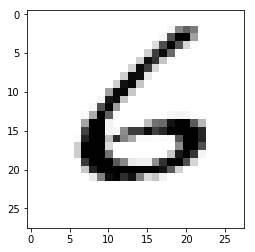

In [12]:
plt.imshow(
    mnist.test.images[r:r + 1].reshape(28, 28), 
    cmap='Greys', interpolation='nearest'
)
plt.show()